## 머신러닝 실습

### 결정트리 분석
> 결정트리 개념

#### 결정트리 개념
- if/else 기반으로 규칙을 찾아 학습, 트리 구조의 분류규칙을 만드는 것
- 정보이득 지수
    - 엔트로피(데이터 집합의 혼잡도) 개념을 기반으로 함.
    - _균일도가 높아지면 혼잡도가 낮아진다_.
    - 정보이득지수는 혼잡도가 줄어들어 얻게되는 이득을 뜻한다.
- 지니계수
    - 데이터의 순도를 뜻한다.
    - _지니계수가 높을수록 순도가 낮은 데이터 집합_
    - 지니계수가 0이면 완전 순수한 데이터 집합  

In [1]:
# 필요 라이브러리 사용등록
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo

#### 데이터 수집
- UC 어바인 머신러닝 연구소 데이터 : 스마트폰 센서 데이터
  > 30명의 연구자원 봉사자가 허리에 갤럭시 S2를 착용하고, 6가지 움직임을 수행, 수집한 XYZ 3축에 대한 데이터
  > 움직임 : WALKING(걷기) , WALKING_UPSTAIRS(계단오르기) , WALKING_DOWNSTAIRS(계단내려가기), SITTING(앉기), STANDING(일어서기), LAYING(눕기)

In [2]:
# 피처이름
dfFeatureName = pd.read_csv('./data/features.txt', header=None, names=['index', 'feature_name'], engine='python',
                            sep='\s+')

<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
/var/folders/44/0l87xs4136n5n95018b2kvrc0000gn/T/ipykernel_1988/1579894749.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+')


In [3]:
dfFeatureName.tail()

,index,feature_name
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"
560,561,"angle(Z,gravityMean)"


In [4]:
# index 제거
featureNames = dfFeatureName.iloc[:, 1].values.tolist()

#### X_train, X_test, y_train, y_test 데이터로드

In [5]:
X_train = pd.read_csv('./data/train/X_train.txt', engine='python', sep='\s+', header=None)
X_train.info()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/44/0l87xs4136n5n95018b2kvrc0000gn/T/ipykernel_1988/2097890605.py:1: SyntaxWarning: invalid escape sequence '\s'
  X_train = pd.read_csv('./data/train/X_train.txt', engine='python', sep='\s+', header=None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [6]:
X_test = pd.read_csv('./data/test/X_test.txt', engine='python', sep='\s+', header=None)
X_test.info()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/44/0l87xs4136n5n95018b2kvrc0000gn/T/ipykernel_1988/2938243783.py:1: SyntaxWarning: invalid escape sequence '\s'
  X_test = pd.read_csv('./data/test/X_test.txt', engine='python', sep='\s+', header=None)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 12.6 MB


In [7]:
y_train = pd.read_csv('./data/train/y_train.txt', engine='python', sep='\s+', header=None)
y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       7352 non-null   int64
dtypes: int64(1)
memory usage: 57.6 KB


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/44/0l87xs4136n5n95018b2kvrc0000gn/T/ipykernel_1988/656771417.py:1: SyntaxWarning: invalid escape sequence '\s'
  y_train = pd.read_csv('./data/train/y_train.txt', engine='python', sep='\s+', header=None)


In [8]:
y_test = pd.read_csv('./data/test/y_test.txt', engine='python', sep='\s+', header=None)
y_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       2947 non-null   int64
dtypes: int64(1)
memory usage: 23.2 KB


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/44/0l87xs4136n5n95018b2kvrc0000gn/T/ipykernel_1988/2792894135.py:1: SyntaxWarning: invalid escape sequence '\s'
  y_test = pd.read_csv('./data/test/y_test.txt', engine='python', sep='\s+', header=None)


In [9]:
X_train.columns = featureNames
X_train.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.070157,-0.588433,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,0.165259,-0.390738,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,0.195034,0.025145,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,0.013865,0.063907,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,0.177404,-0.377404,-0.038678,0.229430,0.269013,...,-0.058402,-0.387052,-0.740738,-0.280088,-0.007739,-0.056088,-0.616956,-0.783267,0.246809,0.036695


In [10]:
X_test.columns = featureNames
X_test.tail()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
2942,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
2943,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
2944,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
2945,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563
2946,0.153627,-0.018437,-0.137018,-0.330046,-0.195253,-0.164339,-0.430974,-0.218295,-0.229933,-0.111527,...,-0.010386,-0.072237,-0.436940,0.598808,-0.287951,0.876030,-0.024965,-0.660080,0.263936,0.188103


In [11]:
y_train.columns = ['action']
y_train.tail()

,action
7347,2
7348,2
7349,2
7350,2
7351,2


In [12]:
y_test.columns = ['action']
y_test.tail()

,action
2942,2
2943,2
2944,2
2945,2
2946,2


In [13]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352, 1), (2947, 561), (2947, 1))

In [14]:
y_train.value_counts()

action
6         1407
5         1374
4         1286
1         1226
2         1073
3          986
Name: count, dtype: int64

In [15]:
labelNames = pd.read_csv('./data/activity_labels.txt', engine='python', sep='\s+', header=None).iloc[:, 1].tolist()
labelNames

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/44/0l87xs4136n5n95018b2kvrc0000gn/T/ipykernel_1988/932737219.py:1: SyntaxWarning: invalid escape sequence '\s'
  labelNames = pd.read_csv('./data/activity_labels.txt', engine='python', sep='\s+', header=None).iloc[:, 1].tolist()


['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

#### 분석모델 구축

In [16]:
# 결정트리 라이브러리 사용등록
from sklearn.tree import DecisionTreeClassifier

In [17]:
# 모델생성
model = DecisionTreeClassifier(random_state=40)

In [18]:
# 모델 훈련 실행
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

#### 예측

In [19]:
y_predict = model.predict(X_test)

#### 분석지표 확인

In [20]:
# 분석지표용 라이브러리 사용등록
from sklearn.metrics import accuracy_score  #정확도

In [21]:
# 정확도 판단
accuracy_score(y_test, y_predict)

0.8551068883610451

In [22]:
# 현재 하이퍼매개변수 확인
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 40,
 'splitter': 'best'}

#### 정확도를 높이기

In [23]:
# 추가 라이브러리 사용등록
from sklearn.model_selection import GridSearchCV

In [24]:
params = {'max_depth': [6, 8, 10, 12, 16, 20, 24]}
gridCV = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

In [25]:
gridCV.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
dfCVResult = pd.DataFrame(gridCV.cv_results_)
dfCVResult[['param_max_depth', 'mean_test_score', 'mean_train_score']]

,param_max_depth,mean_test_score,mean_train_score
0,6,0.848751,0.944879
1,8,0.852567,0.982692
2,10,0.849440,0.993403
3,12,0.847127,0.997212
4,16,0.849441,0.999660
5,20,0.849169,0.999966
6,24,0.849848,1.000000


In [ ]:
# 하이퍼 파라미터를 변경
params = {'max_depth': [8, 10, 16], 'min_samples_split': [2, 20, 24]}

gridCV = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=5, return_train_score=True)

In [ ]:
gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=40),
             param_grid={'max_depth': [8, 10, 16],
                         'min_samples_split': [2, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [ ]:
dfCVResult = pd.DataFrame(gridCV.cv_results_)
dfCVResult[['param_max_depth', 'param_min_samples_split', 'mean_test_score', 'mean_train_score']]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,2,0.852567,0.982692
1,8,20,0.852838,0.978781
2,8,24,0.851615,0.978237
3,10,2,0.849440,0.993403
4,10,20,0.850801,0.985786
5,10,24,0.857873,0.984256
6,16,2,0.849441,0.999660
7,16,20,0.847127,0.988473
8,16,24,0.849574,0.986738


In [ ]:
gridCV.best_score_

0.8578731669418277

In [ ]:
gridCV.best_params_

{'max_depth': 10, 'min_samples_split': 24}

In [ ]:
gridCV.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_split=24, random_state=40)

In [ ]:
# 최고 예측치로 다시 예측
bestModel = gridCV.best_estimator_

In [ ]:
best_y_predict = bestModel.predict(X_test)

In [ ]:
# 정확도
accuracy_score(y_test, best_y_predict)

0.8666440447913132

#### 시각화

In [ ]:
# 독립변수 561개 중 중요도가 높은 변수를 찾는 것.
len(bestModel.feature_importances_)

561

In [ ]:
featureImportances = bestModel.feature_importances_

In [ ]:
# 중요도가 높은 10가지 
featureTop10 = pd.Series(featureImportances, index=X_train.columns).sort_values(ascending=False)[:10]
featureTop10

tGravityAcc-min()-X                0.248497
fBodyAccJerk-bandsEnergy()-1,16    0.208508
angle(Y,gravityMean)               0.137694
fBodyAccMag-energy()               0.113264
tGravityAcc-arCoeff()-Z,2          0.099601
fBodyGyro-maxInds-X                0.023511
tBodyGyro-correlation()-Y,Z        0.016197
tGravityAcc-energy()-Y             0.016118
tBodyAccMag-arCoeff()1             0.012370
tBodyGyro-max()-X                  0.008973
dtype: float64

In [ ]:
# 추가 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

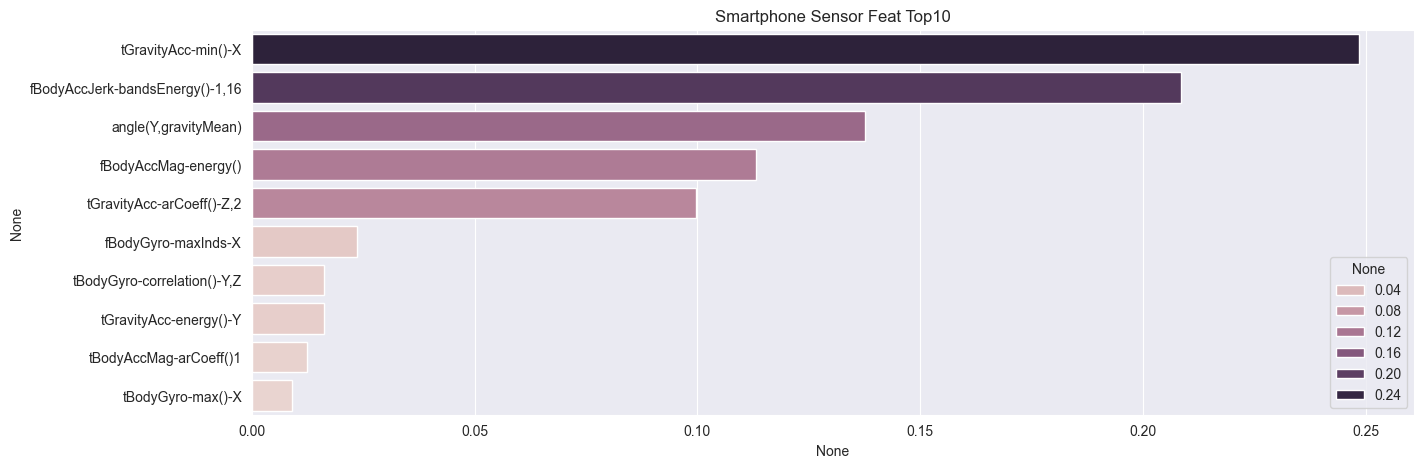

In [ ]:
# 바차트
plt.figure(figsize=(15, 5))
plt.title('Smartphone Sensor Feat Top10')
sns.barplot(x=featureTop10, y=featureTop10.index, hue=featureTop10)
plt.show()

#### 결정트리 시각화

In [ ]:
# tree 만 다시 사용등록
from sklearn import tree

In [ ]:
print(tree.export_text(bestModel))

|--- feature_52 <= 0.10
|   |--- class: 6
|--- feature_52 >  0.10
|   |--- feature_389 <= -0.97
|   |   |--- feature_559 <= 0.14
|   |   |   |--- feature_57 <= -1.00
|   |   |   |   |--- feature_560 <= -0.02
|   |   |   |   |   |--- feature_169 <= -0.98
|   |   |   |   |   |   |--- feature_107 <= 0.41
|   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |--- feature_107 >  0.41
|   |   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_169 >  -0.98
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_560 >  -0.02
|   |   |   |   |   |--- feature_239 <= -0.83
|   |   |   |   |   |   |--- class: 5
|   |   |   |   |   |--- feature_239 >  -0.83
|   |   |   |   |   |   |--- class: 4
|   |   |   |--- feature_57 >  -1.00
|   |   |   |   |--- feature_129 <= -0.87
|   |   |   |   |   |--- feature_159 <= 0.42
|   |   |   |   |   |   |--- feature_52 <= 0.99
|   |   |   |   |   |   |   |--- feature_145 <= -0.69
|   |   |   |   |   |   |   |   |--- class: 

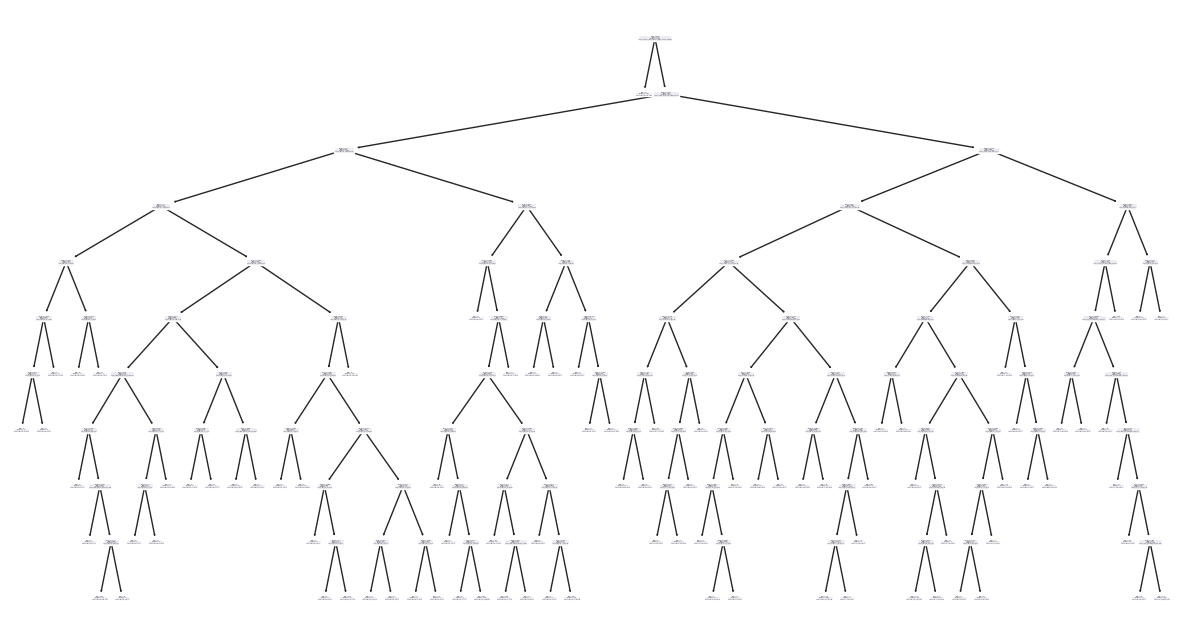

In [ ]:
fig = plt.figure(figsize=(15, 8))
_ = tree.plot_tree(bestModel)

plt.show()

#### Graphviz 패키지 설치
- `pip3 install graphviz`

In [ ]:
!pip3 install graphviz

In [ ]:
# graphviz 와 scikit-learn 연결
from sklearn.tree import export_graphviz

In [ ]:
export_graphviz(bestModel, out_file='tree.dot', class_names=labelNames, feature_names=featureNames, impurity=True,
                filled=True)

In [ ]:
# graphviz 모듈 사용등록
import graphviz

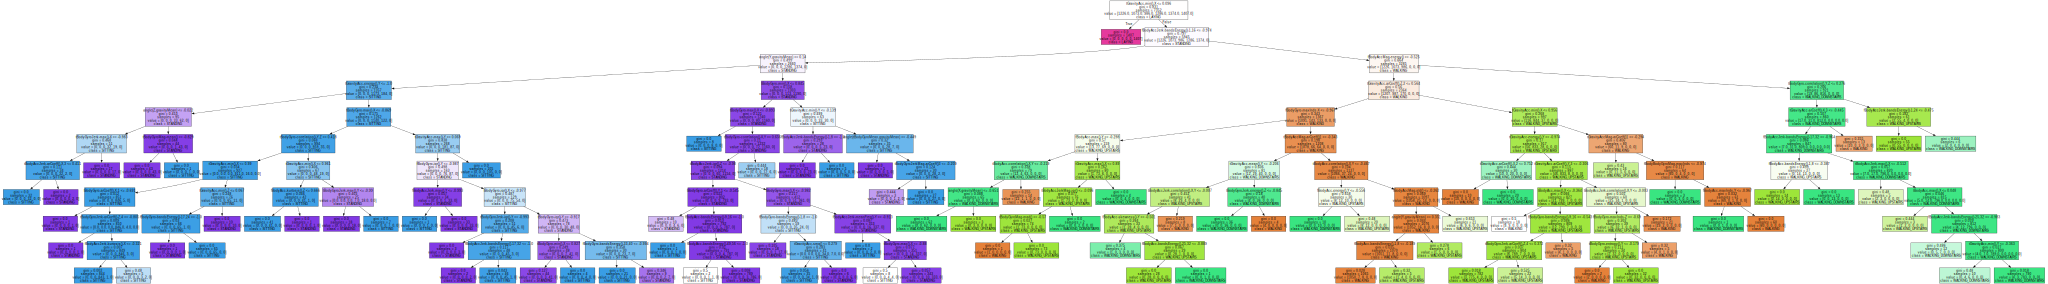

In [ ]:
with open('./tree.dot') as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

#### 결론
> 결정트리는 if/else 의 조건가지고 만드는 모델.